In [215]:
import pandas as pd

data = pd.read_csv('SMA_data.csv')

print(data.head(10))

                     Datetime          SMA
0  2018-01-01 04:34:10.320672  6864.691463
1  2018-01-01 12:37:36.596064  6864.689664
2  2018-01-01 20:31:55.898112  6864.688585
3  2018-01-02 05:42:49.014720  6864.684927
4  2018-01-02 12:13:01.263360  6864.682858
5  2018-01-02 21:38:45.514752  6864.681269
6  2018-01-03 05:20:51.018144  6864.678421
7  2018-01-03 13:20:01.716288  6864.675902
8  2018-01-03 21:10:25.002048  6864.673984
9  2018-01-04 04:56:39.177600  6864.670266


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  2291 non-null   object 
 1   SMA       2291 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.9+ KB


In [217]:
data.isnull().sum()

,0
Datetime,0
SMA,0


In [218]:
data.describe()

,SMA
count,2291.000000
mean,6867.611447
std,4.251829
min,6863.806871
25%,6864.211480
50%,6864.558916
75%,6872.988868
max,6873.482523


In [219]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [220]:
data = data
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.dropna(inplace=True)
#data1.set_index('Datetime', inplace=True)

In [221]:
print(data.head())

                    Datetime          SMA
0 2018-01-01 04:34:10.320672  6864.691463
1 2018-01-01 12:37:36.596064  6864.689664
2 2018-01-01 20:31:55.898112  6864.688585
3 2018-01-02 05:42:49.014720  6864.684927
4 2018-01-02 12:13:01.263360  6864.682858


In [222]:
data = data.sort_values('Datetime')

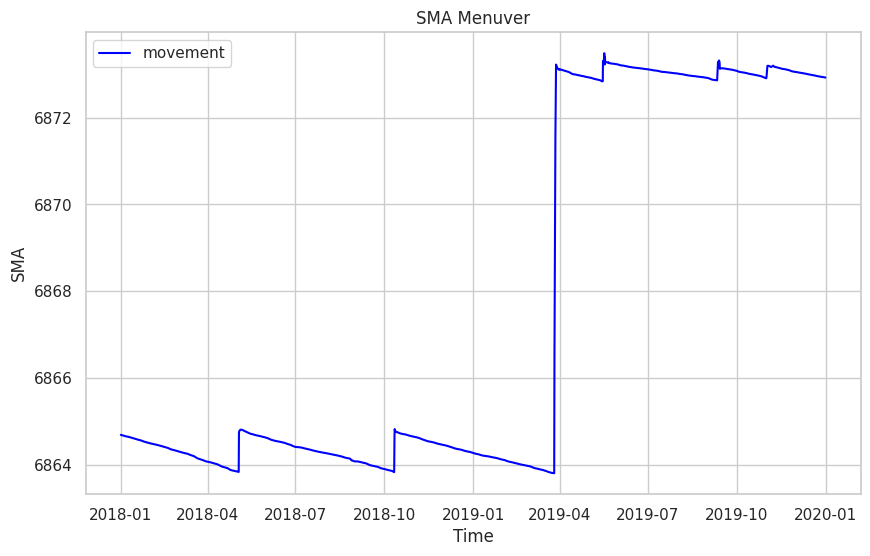

In [223]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=data,x='Datetime',y='SMA', label='movement',color='blue')
plt.xlabel('Time')
plt.ylabel('SMA')
plt.title('SMA Menuver')
plt.show()

In [224]:
import numpy as np
# Calculate the rate of change of SMA
data['sma_diff'] = data['SMA'].diff()
data['sma_diff_rolling_mean'] = data['sma_diff'].rolling(window=5).mean()

# Define a threshold for detecting a maneuver
maneuver_threshold = 0.06
maneuver_max = 1.0  # This value should be tuned based on data analysis
sma_rolling_diff_threshold=0.05
# Detect potential maneuvers
#data['maneuver'] = np.where((abs(data['sma_diff']) > maneuver_threshold)&(abs(data['sma_diff_rolling_mean'])> sma_rolling_diff_threshold), 1, 0)
data['maneuver'] = np.where((abs(data['sma_diff']) > maneuver_threshold)&(abs(data['sma_diff'])< maneuver_max), 1, 0)

data = pd.DataFrame(data)
data.to_csv('res.csv')

# Display the results
print(data[['Datetime', 'SMA', 'sma_diff', 'maneuver']])


                       Datetime          SMA  sma_diff  maneuver
0    2018-01-01 04:34:10.320672  6864.691463       NaN         0
1    2018-01-01 12:37:36.596064  6864.689664 -0.001799         0
2    2018-01-01 20:31:55.898112  6864.688585 -0.001079         0
3    2018-01-02 05:42:49.014720  6864.684927 -0.003658         0
4    2018-01-02 12:13:01.263360  6864.682858 -0.002069         0
...                         ...          ...       ...       ...
2286 2019-12-30 03:03:24.992640  6872.930137 -0.001594         0
2287 2019-12-30 11:05:46.768704  6872.928514 -0.001624         0
2288 2019-12-30 19:01:25.464576  6872.927281 -0.001233         0
2289 2019-12-31 10:44:01.110912  6872.923732 -0.003548         0
2290 2019-12-31 18:43:37.271136  6872.922860 -0.000872         0

[2291 rows x 4 columns]


In [225]:
dm = np.where(abs(data['maneuver']) ==1)
print(dm)

(array([ 384,  871,  872,  873, 1424, 1583, 1585, 1587, 1588, 1589, 1944,
       1945, 1951, 2120]),)


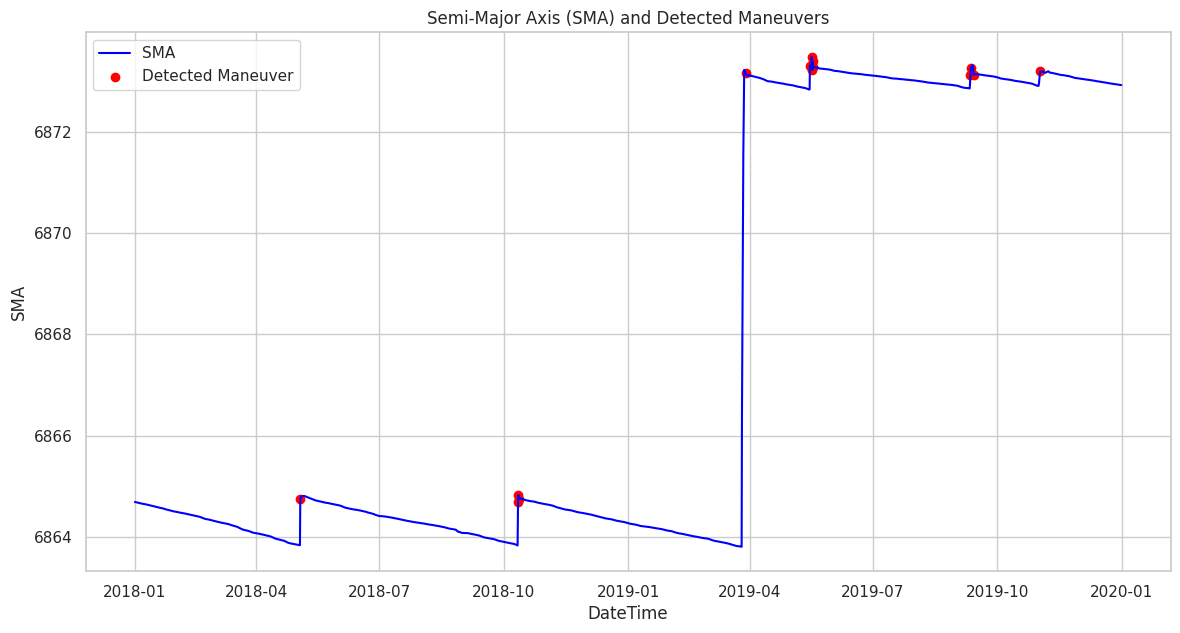

In [226]:
plt.figure(figsize=(14, 7))

    # Plot the SMA over time
plt.plot(data['Datetime'], data['SMA'], label='SMA', color='blue')

    # Highlight detected maneuvers
maneuvers = data[data['maneuver'] == 1]
plt.scatter(maneuvers['Datetime'], maneuvers['SMA'], color='red', label='Detected Maneuver')

plt.title('Semi-Major Axis (SMA) and Detected Maneuvers')
plt.xlabel('DateTime')
plt.ylabel('SMA')
plt.legend()
plt.grid(True)
plt.show()

In [227]:
Result = pd.DataFrame(data['Datetime'][data['maneuver'] == 1])
Result = pd.to_datetime(Result['Datetime']).dt.strftime('%Y-%m-%d')
Result.to_csv('Result.csv')
print(Result)

384     2018-05-03
871     2018-10-11
872     2018-10-11
873     2018-10-12
1424    2019-03-28
1583    2019-05-15
1585    2019-05-16
1587    2019-05-17
1588    2019-05-17
1589    2019-05-17
1944    2019-09-11
1945    2019-09-11
1951    2019-09-13
2120    2019-11-01
Name: Datetime, dtype: object


In [228]:
#Importing required Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [229]:
data_ran_for = pd.read_csv('SMA_data.csv')
data_ran_for['Datetime'] = pd.to_datetime(data_ran_for['Datetime'])
data_ran_for.dropna(inplace=True)
data_ran_for = data_ran_for.sort_values('Datetime')
print(data_ran_for.head())

                    Datetime          SMA
0 2018-01-01 04:34:10.320672  6864.691463
1 2018-01-01 12:37:36.596064  6864.689664
2 2018-01-01 20:31:55.898112  6864.688585
3 2018-01-02 05:42:49.014720  6864.684927
4 2018-01-02 12:13:01.263360  6864.682858


In [230]:
# Feature engineering
data_ran_for['SMA_delta'] = data_ran_for['SMA'].diff()
data_ran_for['SMA_acceleration'] = data_ran_for['SMA_delta'].diff()

data_ran_for.fillna(0, inplace=True)

In [231]:
# Generating labels
threshold = data_ran_for['SMA_delta'].std() * 3  # 3 standard deviations
data_ran_for['label'] = (data_ran_for['SMA_delta'].abs() > threshold).astype(int)

# Spliting data into training and test sets
X = data_ran_for[['SMA', 'SMA_delta', 'SMA_acceleration']]
y = data_ran_for['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [232]:
# Scaling features for better ML performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [233]:
# Training a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

In [234]:

# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(data_ran_for.columns)
print(data_ran_for.head())

[[685   0]
 [  1   2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      0.67      0.80         3

    accuracy                           1.00       688
   macro avg       1.00      0.83      0.90       688
weighted avg       1.00      1.00      1.00       688

Index(['Datetime', 'SMA', 'SMA_delta', 'SMA_acceleration', 'label'], dtype='object')
                    Datetime          SMA  SMA_delta  SMA_acceleration  label
0 2018-01-01 04:34:10.320672  6864.691463   0.000000          0.000000      0
1 2018-01-01 12:37:36.596064  6864.689664  -0.001799          0.000000      0
2 2018-01-01 20:31:55.898112  6864.688585  -0.001079          0.000720      0
3 2018-01-02 05:42:49.014720  6864.684927  -0.003658         -0.002578      0
4 2018-01-02 12:13:01.263360  6864.682858  -0.002069          0.001589      0


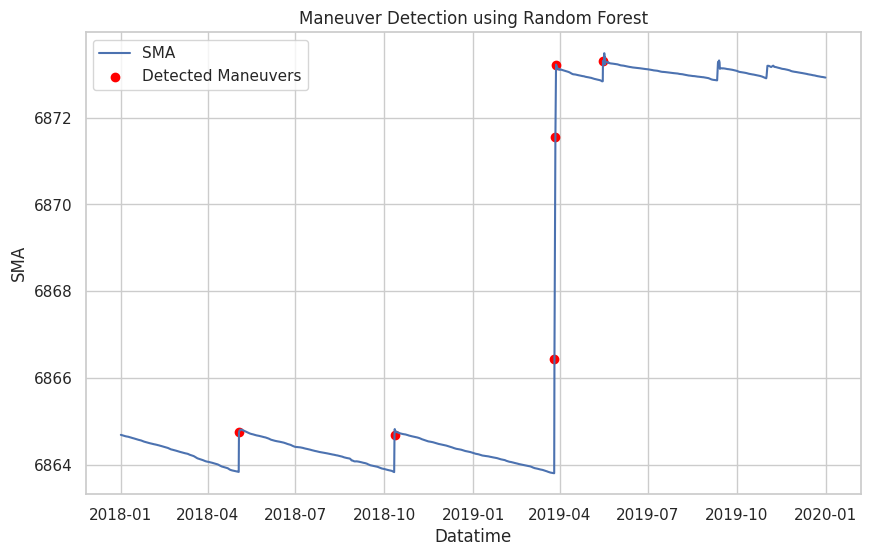

In [235]:
plt.figure(figsize=(10, 6))
plt.plot(data_ran_for['Datetime'], data_ran_for['SMA'], label='SMA')
plt.scatter(data_ran_for['Datetime'][data_ran_for['label'] == 1], data_ran_for['SMA'][data_ran_for['label'] == 1], color='red', label='Detected Maneuvers')
plt.title('Maneuver Detection using Random Forest')
plt.xlabel('Datatime')
plt.ylabel('SMA')
plt.legend()
plt.show()

In [236]:
Result_Random_forest = pd.DataFrame(data_ran_for['Datetime'][data_ran_for['label'] == 1])
Result_Random_forest = pd.to_datetime(Result_Random_forest['Datetime']).dt.strftime('%Y-%m-%d')
Result_Random_forest.to_csv('Result_Random_forest.csv')
print(Result_Random_forest)

384     2018-05-03
871     2018-10-11
1421    2019-03-26
1422    2019-03-27
1423    2019-03-27
1583    2019-05-15
Name: Datetime, dtype: object


In [237]:
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN

In [238]:
data_svm = pd.read_csv('SMA_data.csv')
data_svm['Datetime'] = pd.to_datetime(data_svm['Datetime'])
data_svm.dropna(inplace=True)
data_svm = data_svm.sort_values('Datetime')
print(data_svm.columns)
print(data_svm.head())

Index(['Datetime', 'SMA'], dtype='object')
                    Datetime          SMA
0 2018-01-01 04:34:10.320672  6864.691463
1 2018-01-01 12:37:36.596064  6864.689664
2 2018-01-01 20:31:55.898112  6864.688585
3 2018-01-02 05:42:49.014720  6864.684927
4 2018-01-02 12:13:01.263360  6864.682858


In [239]:
# Feature engineering
data_svm['SMA_delta'] = data_svm['SMA'].diff()
data_svm['SMA_acceleration'] = data_svm['SMA_delta'].diff()

data_svm.fillna(0, inplace=True)

In [240]:
# Labeling Strategy using DBSCAN
scaler = StandardScaler()
SMA_delta_scaled = scaler.fit_transform(data_svm[['SMA_delta']])

# DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
data_svm['label'] = dbscan.fit_predict(SMA_delta_scaled)

data_svm['label'] = data_svm['label'].apply(lambda x: 1 if x == -1 else 0)

# Train-Test Split
X = data_svm[['SMA', 'SMA_delta', 'SMA_acceleration']]
y = data_svm['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [241]:
# Training the SVM Model
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Evaluating the SVM model
y_pred = svm_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[683   0]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       683
           1       0.00      0.00      0.00         5

    accuracy                           0.99       688
   macro avg       0.50      0.50      0.50       688
weighted avg       0.99      0.99      0.99       688



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


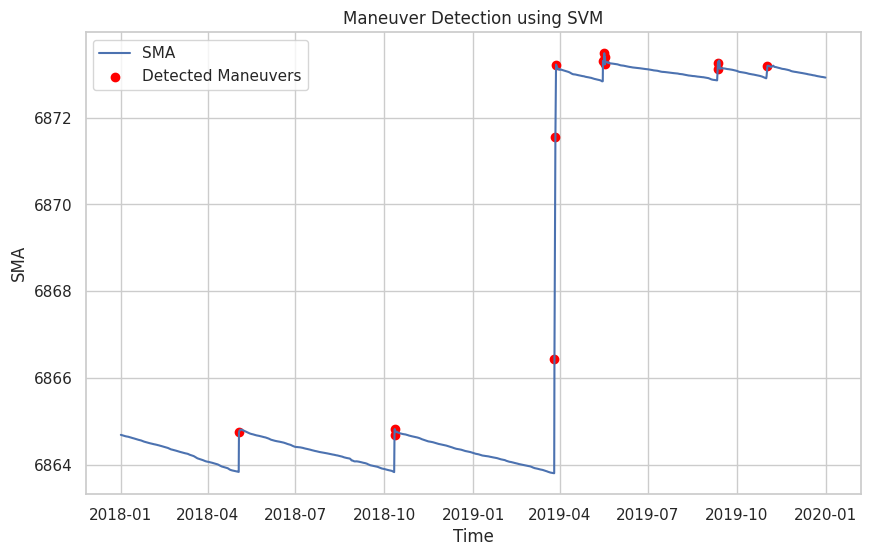

In [242]:
# Visualisation of SMA and detected maneuvers
plt.figure(figsize=(10, 6))
plt.plot(data_svm['Datetime'], data_svm['SMA'], label='SMA')
plt.scatter(data_svm['Datetime'][data_svm['label'] == 1], data_svm['SMA'][data_svm['label'] == 1], color='red', label='Detected Maneuvers')
plt.title('Maneuver Detection using SVM')
plt.xlabel('Time')
plt.ylabel('SMA')
plt.legend()
plt.show()

In [243]:
Result_svm = pd.DataFrame(data_svm['Datetime'][data_svm['label'] == 1])
Result_svm = pd.to_datetime(Result_svm['Datetime']).dt.strftime('%Y-%m-%d')
Result_svm.to_csv('Result_SVM.csv')
print(Result_svm)

384     2018-05-03
871     2018-10-11
872     2018-10-11
1421    2019-03-26
1422    2019-03-27
1423    2019-03-27
1583    2019-05-15
1585    2019-05-16
1587    2019-05-17
1588    2019-05-17
1944    2019-09-11
1945    2019-09-11
2120    2019-11-01
Name: Datetime, dtype: object


In [244]:
from xgboost import XGBClassifier

data_xg = pd.read_csv('SMA_data.csv')
data_xg['Datetime'] = pd.to_datetime(data_xg['Datetime'])
data_xg.dropna(inplace=True)
data_xg = data_xg.sort_values('Datetime')

print(data_xg.columns)
print(data_xg.head())

Index(['Datetime', 'SMA'], dtype='object')
                    Datetime          SMA
0 2018-01-01 04:34:10.320672  6864.691463
1 2018-01-01 12:37:36.596064  6864.689664
2 2018-01-01 20:31:55.898112  6864.688585
3 2018-01-02 05:42:49.014720  6864.684927
4 2018-01-02 12:13:01.263360  6864.682858


In [245]:
# Feature engineering
data_xg['SMA_delta'] = data_xg['SMA'].diff()
data_xg['SMA_acceleration'] = data_xg['SMA_delta'].diff()

# Replace NaN values with 0
data_xg.fillna(0, inplace=True)

In [246]:
# Labeling using DBSCAN for outlier detection
scaler = StandardScaler()
SMA_delta_scaled = scaler.fit_transform(data_xg[['SMA_delta']])

# DBSCAN to detect outliers which we interpret as maneuvers
dbscan = DBSCAN(eps=0.5, min_samples=5)
data_xg['label'] = dbscan.fit_predict(SMA_delta_scaled)

data_xg['label'] = data_xg['label'].apply(lambda x: 1 if x == -1 else 0)

In [247]:

# Spliting data into training and test sets
X = data_xg[['SMA', 'SMA_delta', 'SMA_acceleration']]
y = data_xg['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [248]:
# Training XGBoost model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# predictions on test data
y_pred = xgb_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:01:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[683   0]
 [  0   5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       1.00      1.00      1.00         5

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688



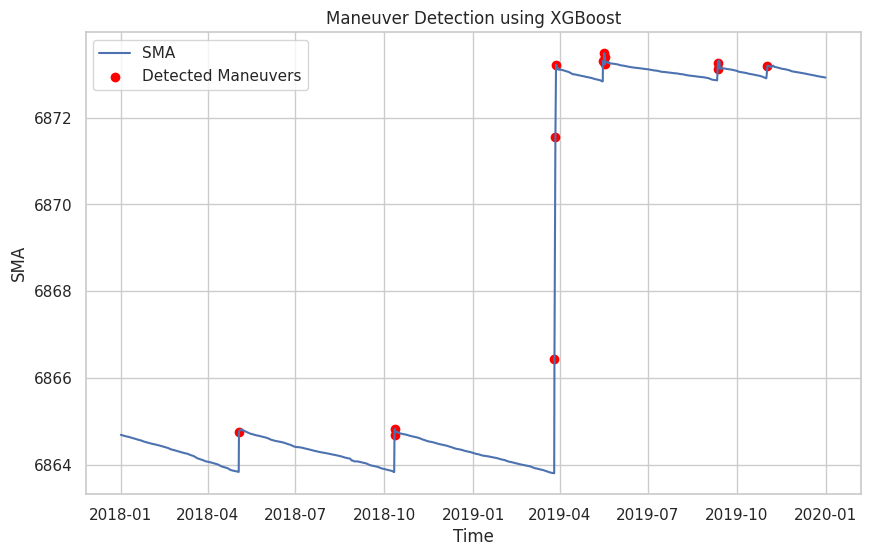

In [249]:
# Visualisation of SMA and detected maneuvers
plt.figure(figsize=(10, 6))
plt.plot(data_xg['Datetime'], data_xg['SMA'], label='SMA')
plt.scatter(data_xg['Datetime'][data_xg['label'] == 1], data_xg['SMA'][data_xg['label'] == 1], color='red', label='Detected Maneuvers')
plt.title('Maneuver Detection using XGBoost')
plt.xlabel('Time')
plt.ylabel('SMA')
plt.legend()
plt.show()

In [251]:
Result_XGBoost = pd.DataFrame(data_xg['Datetime'][data_xg['label'] == 1])
Result_XGBoost = pd.to_datetime(Result_XGBoost['Datetime']).dt.strftime('%Y-%m-%d')
Result_XGBoost.to_csv('Result_XGBoost.csv')
print(Result_XGBoost)

384     2018-05-03
871     2018-10-11
872     2018-10-11
1421    2019-03-26
1422    2019-03-27
1423    2019-03-27
1583    2019-05-15
1585    2019-05-16
1587    2019-05-17
1588    2019-05-17
1944    2019-09-11
1945    2019-09-11
2120    2019-11-01
Name: Datetime, dtype: object
